## BW2 Multi-method Monte Carlo
Adapts the built-in Monte Carlo approach to compute arbitrarily many LCIA methods with each inventory iteration. This did not seem possible with stock brightway, but it was easy enough to do.

Also, stores the results in a persistent, UUID-based filename so that MCA results continue to accumulate.

In [1]:
STUDY_PATH = '/data/GitHub/2018/variability_jlca/'
import sys
sys.path.append(STUDY_PATH)

In [2]:
from lca_variability import initialize_activity, Bw2McaMarketWeight, Bw2McaSimple

In [3]:
recipe_methods = [('ReCiPe Midpoint (H)', 'climate change', 'GWP100'),
                  ('ReCiPe Midpoint (H)', 'terrestrial acidification', 'TAP100'),
                  ('ReCiPe Midpoint (H)', 'photochemical oxidant formation', 'POFP'),
                  ('ReCiPe Midpoint (H)', 'marine eutrophication', 'MEP')
                 ]

In [8]:
a = initialize_activity('ei3.4 apos', '4d024c87-fcab-4980-9347-c3bee224671f', steps=0)  # APOS market for glycerine

In [9]:
a.add_methods(*recipe_methods)

Up to date with 0 samples, 4 methods


In [10]:
a.steps = 10

Up to date with 10 samples, 4 methods
Added 40 results from 10 MCA samples (17.973 sec)
Written to /data/GitHub/2018/variability_jlca/jupyter/BW2_MCA_4d024c87-fcab-4980-9347-c3bee224671f.json.gz


In [11]:
a._res

defaultdict(list,
            {'ReCiPe Midpoint (H)__climate change__GWP100': [3.750915538073502,
              3.9720460180494817,
              3.8161210696041383,
              4.295028428872345,
              3.37751774989359,
              3.3986106758597385,
              3.959049780018135,
              3.1493704715024613,
              3.945619558153843,
              3.852569754462622],
             'ReCiPe Midpoint (H)__terrestrial acidification__TAP100': [0.01814784728116764,
              0.02671976872586121,
              0.018893772364167023,
              0.019990716479295526,
              0.018081862322036447,
              0.021218097965141756,
              0.021750822852113598,
              0.018031959226592984,
              0.01894982354680469,
              0.020115066015623715],
             'ReCiPe Midpoint (H)__photochemical oxidant formation__POFP': [0.010079421496114894,
              0.01159172602932336,
              0.010472897656527718,
              0.

In [13]:
a.steps=20

Up to date with 20 samples, 4 methods
Added 40 results from 10 MCA samples (8.941 sec)
Written to /data/GitHub/2018/variability_jlca/jupyter/BW2_MCA_4d024c87-fcab-4980-9347-c3bee224671f.json.gz


In [14]:
a.activity

'market for glycerine' (kilogram, GLO, None)

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

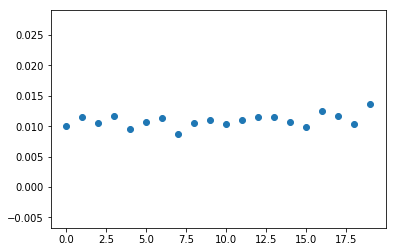

In [16]:
plt.scatter(range(a.steps), a.scores(recipe_methods[2]))

In [17]:
from lca_variability.bw2_mkt_weight import MarketMonteCarloIterator

In [18]:
mmci = MarketMonteCarloIterator(a.activity)

In [19]:
mmci.suppliers

['esterification of rape oil' (kilogram, CH, None),
 'esterification of rape oil' (kilogram, Europe without Switzerland, None),
 'esterification of soybean oil' (kilogram, BR, None),
 'esterification of soybean oil' (kilogram, US, None),
 'glycerine production, from epichlorohydrin' (kilogram, RER, None),
 'stearic acid production' (kilogram, GLO, None),
 'esterification of palm oil' (kilogram, RoW, None),
 'esterification of rape oil' (kilogram, RoW, None),
 'esterification of soybean oil' (kilogram, RoW, None),
 'glycerine production, from epichlorohydrin' (kilogram, RoW, None)]

In [20]:
mmci.market_shares

[0.000236231816466662,
 0.121386818058536,
 0.00259814209353471,
 0.110182481155344,
 0.0625210911363444,
 0.0165342367731109,
 0.00298360326841286,
 0.246931655187543,
 0.311583558238018,
 0.125042182272689]

In [21]:
ixs = [next(mmci._chooser) for i in range(5000)]

<BarContainer object of 10 artists>

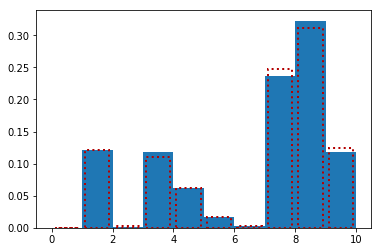

In [36]:
plt.hist(ixs, bins=range(len(mmci.market_shares) + 1), density=True)
xs = [0.5 + x for x in range(len(mmci.market_shares))]
plt.bar(xs, mmci.market_shares, 
        color='none', edgecolor=(0.7, 0, 0), linewidth=2, linestyle=':')

In [39]:
b = Bw2McaMarketWeight(a.activity, *recipe_methods, steps=250)

Completed 100 MCA samples (64.527 sec)
Completed 200 MCA samples (98.313 sec)
Up to date with 250 samples, 4 methods
Added 1000 results from 250 MCA samples (115.374 sec)
Written to /data/GitHub/2018/variability_jlca/jupyter/BW2_MktWt_4d024c87-fcab-4980-9347-c3bee224671f.json.gz


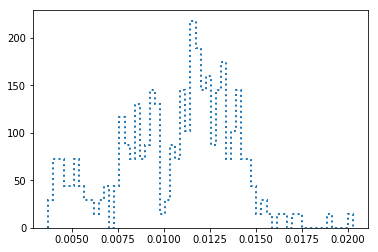

In [40]:
_ = plt.hist(b.scores(recipe_methods[2]), bins=60, density=True, histtype='step', linestyle=':', linewidth=2)